### Student Information
Name: Anna-Sophie Beatrice Eberhardt

Student ID: 314261801

GitHub ID: saylaa5923

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

Import libs and dataset loading

In [144]:
### Begin Assignment Here
# test code for environment setup --> copied from Master
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#use reddit dataset
data_df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
data_df


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


Preprocessing: remove missing values/change dataset columns, remove duplicates, append categories (ex. time for possible visualization purposes afterwards)

In [145]:
#different methods
import helpers.data_mining_helpers as dmh
data_df.describe()
sum(data_df['text'].duplicated()) #only interested in duplicated text (23 entries)
data_df.isnull().apply(lambda x: dmh.check_missing_values(x))
#dropna --> downvotes and upvotes are not na/missing for all but 64 out of 847 entries
#df_small = data_df.dropna()

#new data_frame without upvotes, downvotes, upvote ratio
cols = data_df.columns
cols = cols.drop(['upvotes', 'downvotes', 'upvote_ratio'])
#also don't care about unique values like post_id, or url 
#url is either from a newssource or reddit itself, I already have information about subreddit and type
cols = cols.drop(['post_id', 'url']) 
#drop duplicates in text
new_df = data_df[cols]
new_df = new_df[~new_df['text'].duplicated()]
new_df.nunique()

#append time category
dummy_time_df = pd.to_datetime(new_df['datetime'])
dummy_time_df.dt.hour
bins = [0, 6, 12, 18, 24]
labels = ["Night", "Morning", "Afternoon", "Evening"]
new_df["time_category"] = pd.cut(dummy_time_df.dt.hour, bins=bins, labels=labels, right=False)

Tokenize text and title, build vocabulary for both and create two separate counts (one for each category)

In [146]:
#no sampling performed bc already rather small dataset and maybe if i want to train smth in the second phase 
#i would like to have a "nicer" train test validation split
nltk.download("punkt")
nltk.download("punkt_tab")
#Based on how reddit works sometimes most of the post is already in the title
new_df['unigrams_text'] = new_df['text'].apply(lambda x: dmh.tokenize_text(x))
new_df['unigrams_title'] = new_df['title'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
#fit to concatinated version --> vocabulary made out of titles and text
count_vect.fit(pd.concat([new_df.text, new_df.title]))
#transform independently --> separate sparse matrices
text_counts = count_vect.transform(new_df.text)
title_counts = count_vect.transform(new_df.title)

print(text_counts.shape, title_counts.shape)
print(count_vect.get_feature_names_out()[550:650])
analyze = count_vect.build_analyzer()
analyze(new_df.text[0])

(824, 4508) (824, 4508)
['beta' 'betrayals' 'betrayed' 'bets' 'better' 'betting' 'between'
 'beyond' 'biases' 'bickering' 'bid' 'biden' 'big' 'bigg' 'bigger'
 'biggest' 'bigly' 'billion' 'billionaire' 'billionaires' 'billions'
 'bills' 'bing' 'bit' 'bitb' 'bitching' 'bitcoin' 'bitf' 'bkkt' 'black'
 'blackrock' 'blame' 'blaming' 'blatant' 'blazer' 'blazing' 'blend' 'blgo'
 'blind' 'blink' 'blinked' 'blinks' 'blnk' 'blockchain' 'bloomberg'
 'blown' 'blue' 'bluff' 'bluffed' 'bmw' 'bnzi' 'board' 'boating' 'bob'
 'bois' 'boliviana' 'bolster' 'bolton' 'bomb' 'bond' 'bonds' 'bong'
 'bonus' 'book' 'booking' 'boom' 'boomed' 'boomer' 'boomers' 'boost'
 'borderline' 'bored' 'boring' 'borrow' 'bot' 'both' 'bottom' 'bought'
 'bounce' 'bouncing' 'bowl' 'box' 'boycott' 'boycotting' 'boys' 'bp'
 'brace' 'brain' 'branch' 'brand' 'branded' 'brasileiro' 'brazil'
 'brazilian' 'break' 'breakdown' 'breakeven' 'breaking' 'breakout'
 'breast']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kuros\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kuros\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['calls', 'on', 'retards']

Visualization of some categories using seaborn

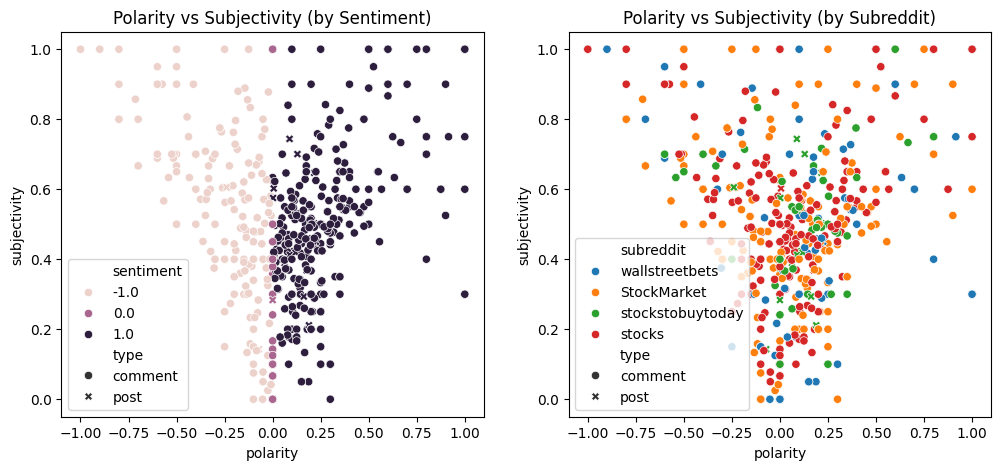

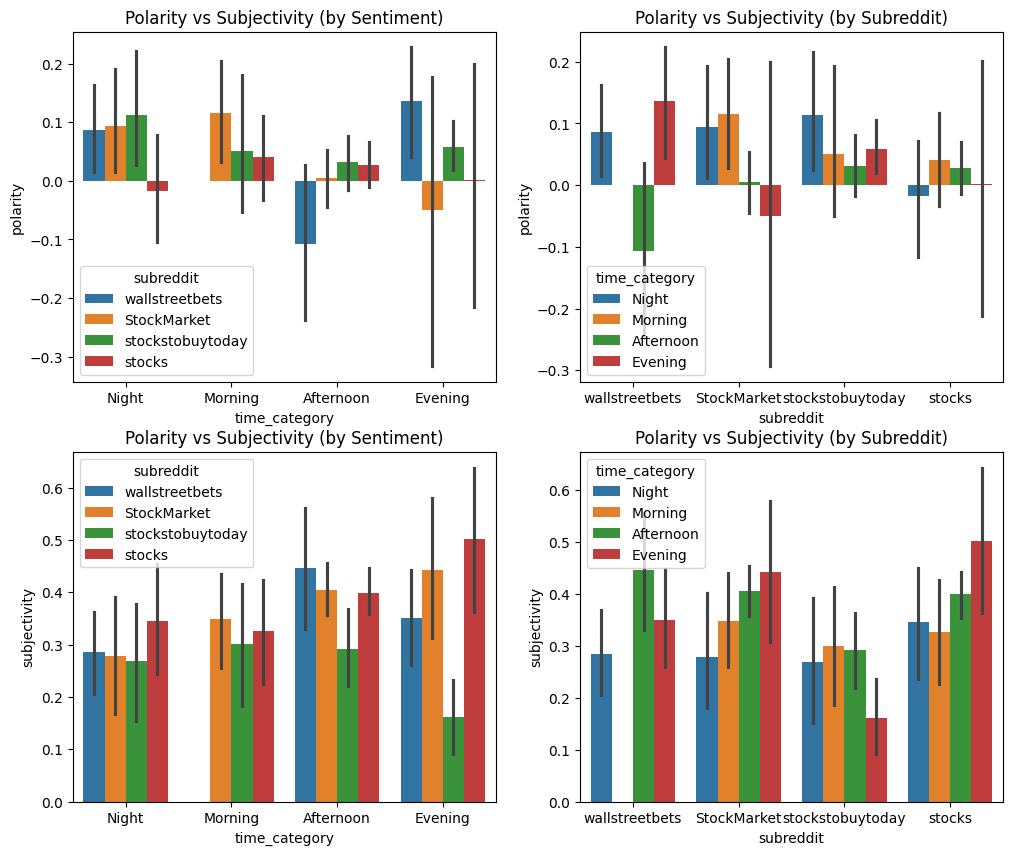

In [ ]:
fig, axs_sc = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(data = new_df, x = 'polarity', y='subjectivity', hue='sentiment', style = 'type', ax=axs_sc[0])
sns.scatterplot(data = new_df, x = 'polarity', y='subjectivity', hue='subreddit', style = 'type', ax=axs_sc[1])
axs_sc[0].set_title("Polarity vs Subjectivity (by Sentiment)")
axs_sc[1].set_title("Polarity vs Subjectivity (by Subreddit)")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(data = new_df, x = 'time_category', y='polarity', hue = 'subreddit', ax=axs[0, 0])
sns.barplot(data = new_df, x = 'subreddit', y='polarity', hue = 'time_category',ax=axs[0, 1])
sns.barplot(data = new_df, x = 'time_category', y='subjectivity', hue = 'subreddit', ax=axs[1, 0])
sns.barplot(data = new_df, x = 'subreddit', y='subjectivity', hue = 'time_category',ax=axs[1, 1])
axs[0,0].set_title("Polarity per Time category (by Subreddit)")
axs[0,1].set_title("Polarity per Subreddit (by Time category)")
axs[1,0].set_title("Subjectivity per Time category (by Subreddit)")
axs[1,1].set_title("Subjectivity per Subreddit (by Time category)")
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here